In [5]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from dateutil import parser;

In [6]:
dataset = pd.read_csv(r"archive\appdata10.csv")

In [7]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [8]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
dataset.hour=dataset.hour.str.slice(1,3).astype(int)

In [10]:
num_dataset=dataset.drop(columns=['user','first_open','screen_list','enrolled','enrolled_date'],axis=1);
num_dataset.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


C:\Users\VASU\AppData\Local\Temp\ipykernel_15752\1979758670.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset.age,shade=True)


<Axes: xlabel='age', ylabel='Density'>

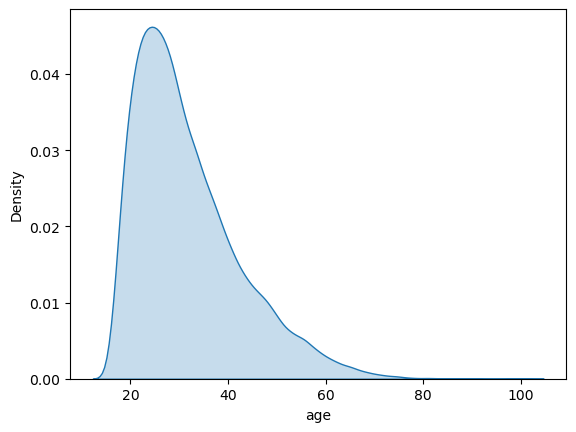

In [11]:
sns.kdeplot(data=dataset.age,shade=True)

<Axes: xlabel='age', ylabel='numscreens'>

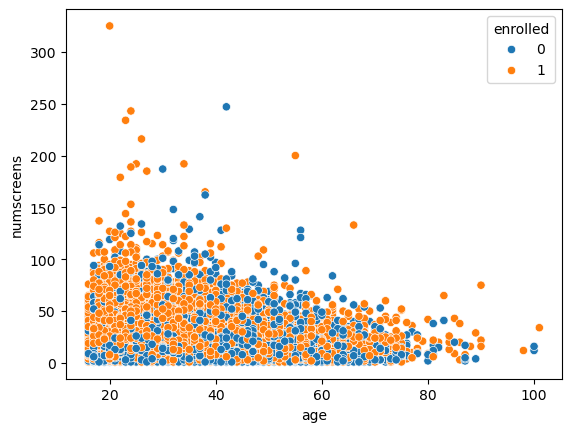

In [12]:
sns.scatterplot(x=dataset.age,y=dataset.numscreens,hue=dataset.enrolled)

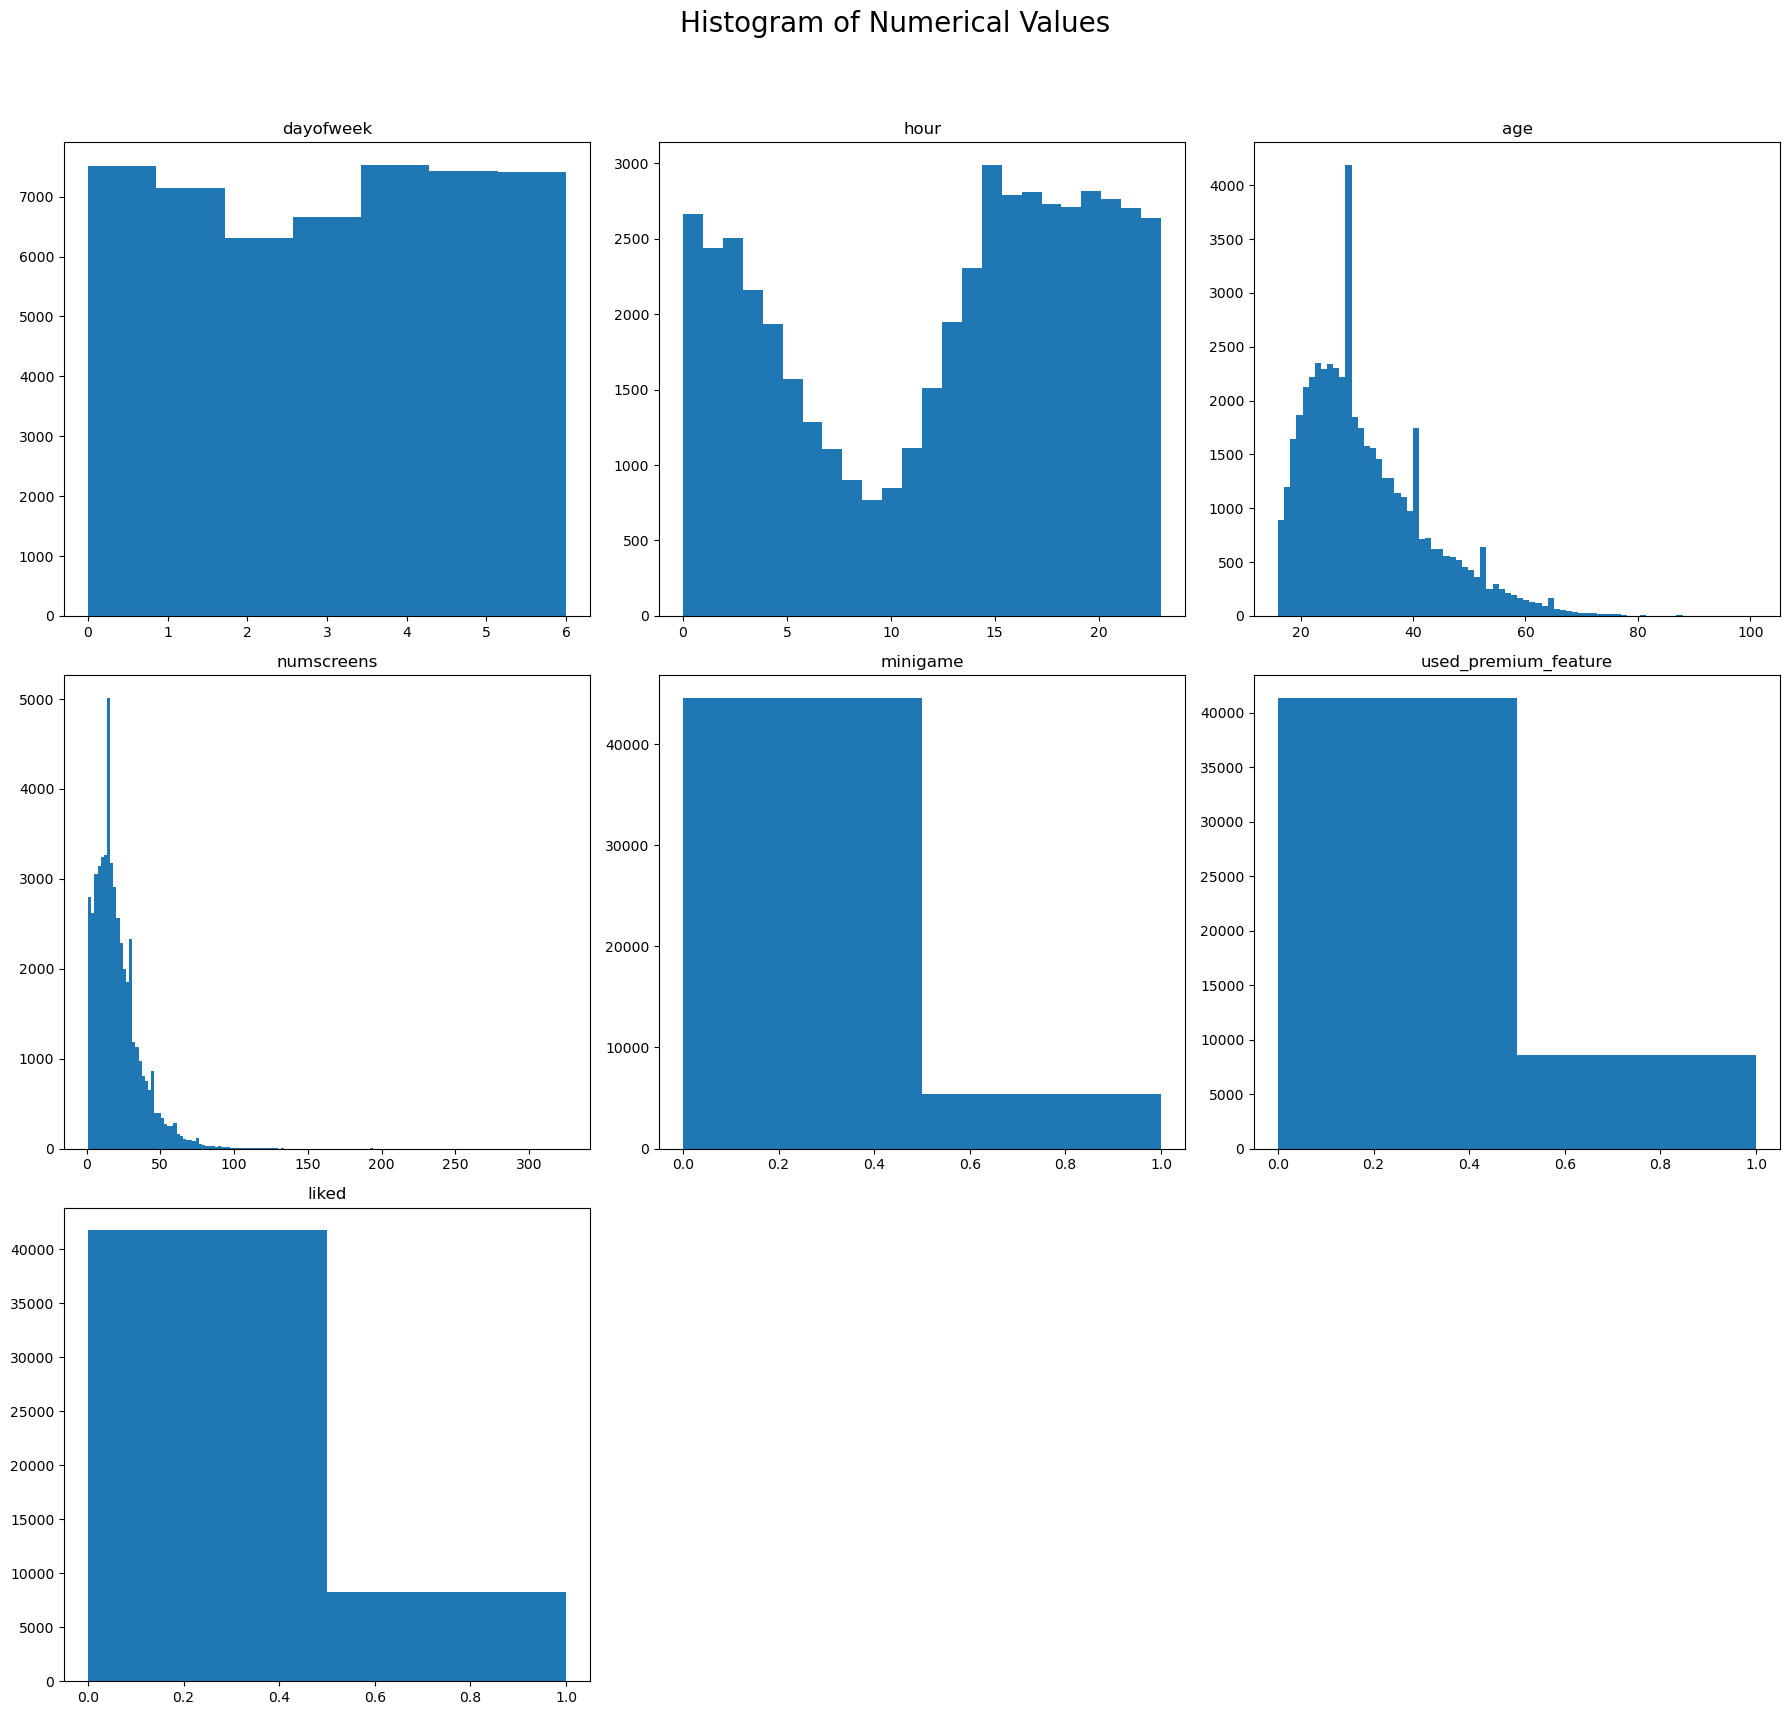

In [13]:
plt.figure(figsize=(18,18))
plt.suptitle("Histogram of Numerical Values",fontsize=20)
for i in range(0,num_dataset.shape[1]):
  plt.subplot(3,3,i+1)
  f=plt.gca()
  f.set_title(num_dataset.columns[i])
  vals=num_dataset.iloc[:,i].nunique()
  plt.hist(num_dataset.iloc[:,i],bins=vals)
plt.tight_layout(rect=[0,0.03,1,0.95])

<Axes: title={'center': 'Correlation with Target Variable'}>

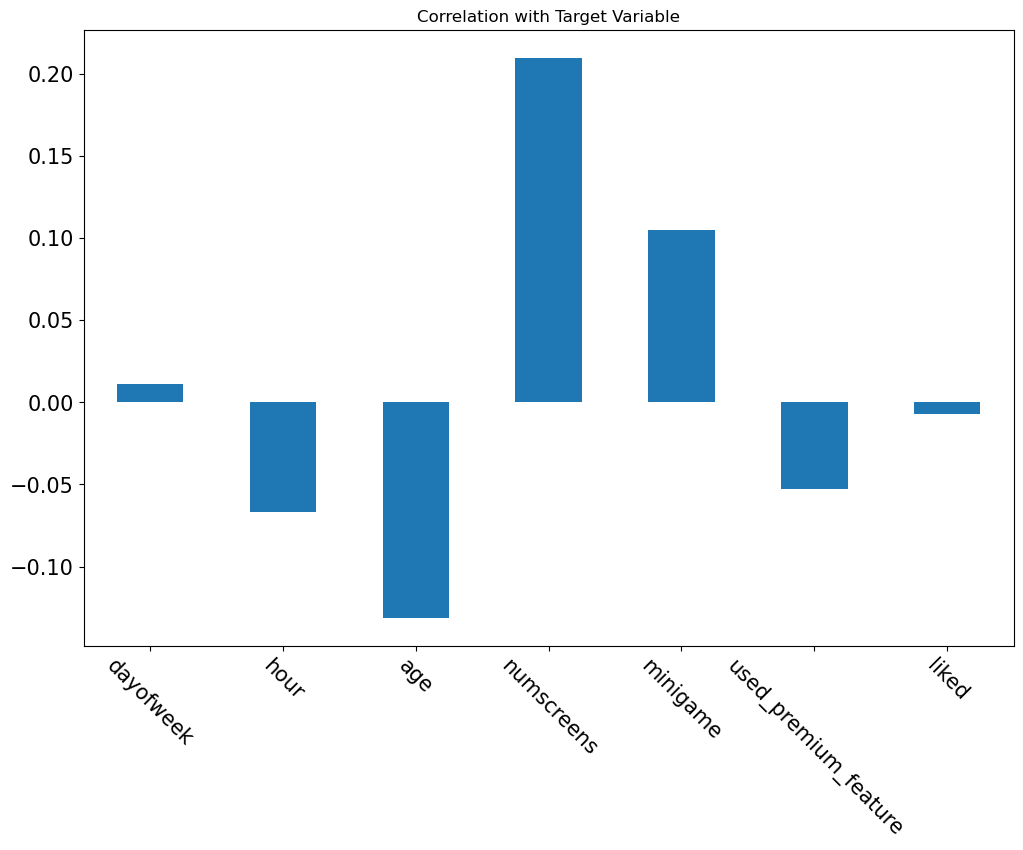

In [14]:
num_dataset.corrwith(dataset.enrolled).plot.bar(figsize=(12,8),fontsize=15,title="Correlation with Target Variable",rot=-45)

#CO-RELATION MATRIX PLOT


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'dayofweek'),
  Text(1.5, 0, 'hour'),
  Text(2.5, 0, 'age'),
  Text(3.5, 0, 'numscreens'),
  Text(4.5, 0, 'minigame'),
  Text(5.5, 0, 'used_premium_feature'),
  Text(6.5, 0, 'liked')])

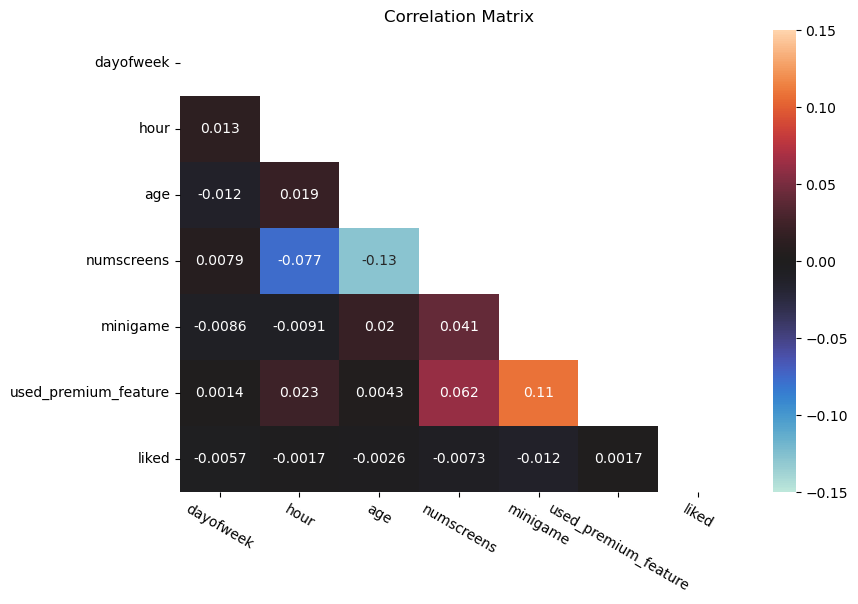

In [15]:
plt.figure(figsize=(9,6))
corr=num_dataset.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.title("Correlation Matrix")
sns.heatmap(corr,mask=mask,annot=True,center=0,vmax=0.15,vmin=-0.15)
plt.xticks(rotation=-30)

In [16]:
date_dataset=dataset.copy()
date_dataset.dropna(inplace=True)
date_dataset.reset_index(inplace=True)
dataset.drop(columns=['first_open','enrolled_date'],axis=1,inplace=True)
date_dataset.drop(columns=dataset.columns,axis=1,inplace=True)
print(date_dataset.head())
print(date_dataset.dtypes)

   index               first_open            enrolled_date
0      3  2013-07-05 16:08:46.354  2013-07-05 16:11:49.513
1      4  2013-02-26 18:50:48.661  2013-02-26 18:56:37.841
2      5  2013-04-03 09:58:15.752  2013-04-03 09:59:03.291
3      8  2013-03-20 14:22:01.569  2013-04-27 22:24:54.542
4      9  2013-04-26 18:22:16.013  2013-04-26 18:31:58.923
index             int64
first_open       object
enrolled_date    object
dtype: object


In [17]:


# Safely convert to datetime
date_dataset['first_open'] = pd.to_datetime(date_dataset['first_open'])
date_dataset['enrolled_date'] = pd.to_datetime(date_dataset['enrolled_date'])

# Compute difference in hours
date_dataset['diff'] = (date_dataset['enrolled_date'] - date_dataset['first_open']) / np.timedelta64(1, 'h')

# Display
print(date_dataset.head())
print(date_dataset.dtypes)


   index              first_open           enrolled_date        diff
0      3 2013-07-05 16:08:46.354 2013-07-05 16:11:49.513    0.050877
1      4 2013-02-26 18:50:48.661 2013-02-26 18:56:37.841    0.096994
2      5 2013-04-03 09:58:15.752 2013-04-03 09:59:03.291    0.013205
3      8 2013-03-20 14:22:01.569 2013-04-27 22:24:54.542  920.048048
4      9 2013-04-26 18:22:16.013 2013-04-26 18:31:58.923    0.161919
index                     int64
first_open       datetime64[ns]
enrolled_date    datetime64[ns]
diff                    float64
dtype: object


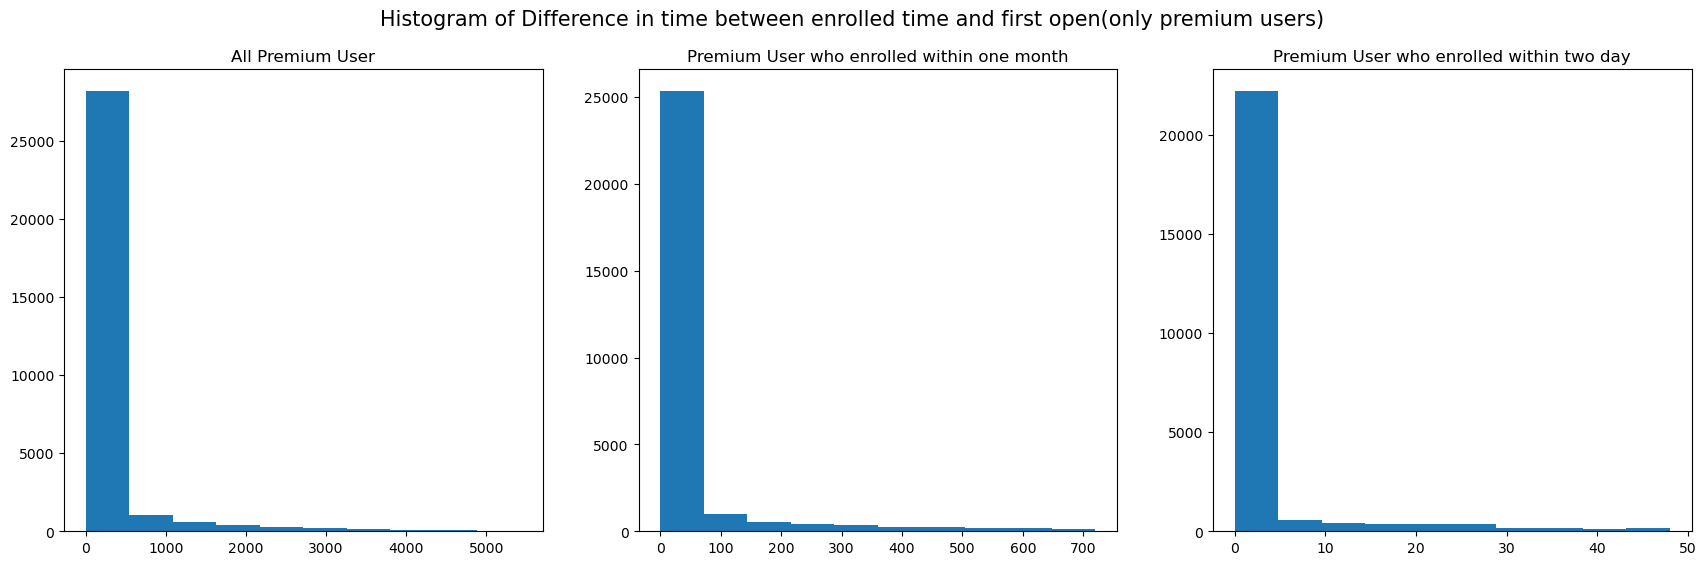

In [18]:
plt.figure(figsize=(21,6))
plt.suptitle("Histogram of Difference in time between enrolled time and first open(only premium users)",fontsize=15)
plt.subplot(1,3,1)
plt.hist(date_dataset['diff'])
plt.title("All Premium User")
plt.subplot(1,3,2)
plt.hist(date_dataset['diff'],range=(0,720))
plt.title("Premium User who enrolled within one month")
plt.subplot(1,3,3)
plt.hist(date_dataset['diff'],range=(0,48))
plt.title("Premium User who enrolled within two day")
plt.show()


0.1% Percentage of Premium User enrolled within one hour
20.2% Percentage of Premium User enrolled after 2 days


Text(0.5, 1.0, 'Premium User who Enrolled in atleast one and within 2 days')

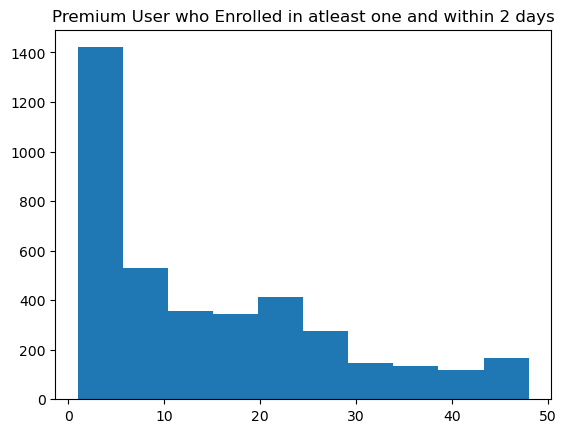

In [19]:
premium_user=date_dataset.shape[0]
instant_user=len([i for i in range(0,premium_user) if date_dataset['diff'][i]==0])
lazy_user=len([i for i in range(0,premium_user) if date_dataset['diff'][i]>48])
print(str(round(100*instant_user/premium_user,1)) + "% Percentage of Premium User enrolled within one hour")
print(str(round(100*lazy_user/premium_user,1)) + "% Percentage of Premium User enrolled after 2 days")
plt.hist(date_dataset['diff'],range=(1,48))
plt.title("Premium User who Enrolled in atleast one and within 2 days")

In [20]:
top_screen=pd.read_csv(r"archive\top_screens.csv").top_screens.values
print("Top screen Extracted")

Top screen Extracted


In [21]:
dataset

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [22]:
dataset.drop(["user", "screen_list"], axis = 1, inplace = True)

In [23]:
dataset

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,1,0
49996,1,0,35,4,0,1,0,0
49997,2,22,39,25,0,0,0,0
49998,6,12,27,26,0,0,1,0


In [24]:
Y = dataset["enrolled"]
Y

0        0
1        0
2        0
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: enrolled, Length: 50000, dtype: int64

In [25]:
X = dataset.drop(["enrolled"], axis = 1)

In [26]:
X

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


In [27]:
from sklearn.model_selection import train_test_split;
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_X_train=pd.DataFrame(sc.fit_transform(X_train))
sc_X_test =pd.DataFrame(sc.transform(X_test))
sc_X_train.columns=X_train.columns
sc_X_test.columns=X_test.columns

In [29]:
#Confusion Matrix for Binary Classification Problem
from sklearn.metrics import confusion_matrix;
def heatmap_confusion_matrix(y_true,y_pred):
  cm=confusion_matrix(y_true,y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
  group_percent = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percent)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(6,4))
  sns.set(font_scale=1.2)
  sns.heatmap(cm,annot=labels,fmt='',cmap='Blues')
  plt.xlabel("Predicted Value")
  plt.ylabel("Actual Value")
  plt.show()
    
#Metrics for Classification Problem
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score;
def classification_metrics(y_true,y_pred):
  print("Accuracy Score  : ",round(accuracy_score(y_true,y_pred),3))
  print("Precision Score : ",round(precision_score(y_true,y_pred),3))
  print("Recall Score    : ",round(recall_score(y_true,y_pred),3))
  print("F1 Score        : ",round(f1_score(y_true,y_pred),3))
    
#Apply K-fold Cross Validation for Classification Problem
from sklearn.model_selection import cross_val_score;
def k_fold_cross_validation(model,train_data,train_response,number):
  accuracies=cross_val_score(estimator=model,X=train_data,y=train_response,cv=number)
  print("Mean Accuracy of Model : ",round(accuracies.mean(),3))
  print("Standard Deviation is  : ",round(accuracies.std(),3))
  print()

LOGISTIC REGRESSION


Logistic Regression Model


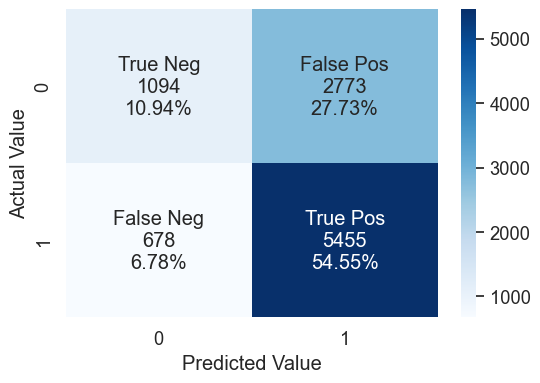

Accuracy Score  :  0.655
Precision Score :  0.663
Recall Score    :  0.889
F1 Score        :  0.76
Mean Accuracy of Model :  0.663
Standard Deviation is  :  0.005



In [30]:
from sklearn.linear_model import LogisticRegression;
log_classifier=LogisticRegression();
log_classifier.fit(sc_X_train,y_train);
log_y_pred=log_classifier.predict(sc_X_test);
print("Logistic Regression Model")
heatmap_confusion_matrix(y_test,log_y_pred)
classification_metrics(y_test,log_y_pred)
k_fold_cross_validation(log_classifier,X_train,y_train,10)

DECISION TREES


Decision Tree Model


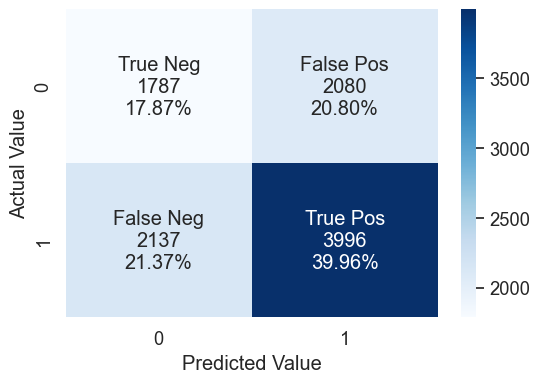

Accuracy Score  :  0.578
Precision Score :  0.658
Recall Score    :  0.652
F1 Score        :  0.655
Mean Accuracy of Model :  0.573
Standard Deviation is  :  0.006



In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier= DecisionTreeClassifier();
dt_classifier.fit(sc_X_train,y_train);
dt_y_pred=dt_classifier.predict(sc_X_test);
print("Decision Tree Model")
heatmap_confusion_matrix(y_test,dt_y_pred)
classification_metrics(y_test,dt_y_pred)
k_fold_cross_validation(dt_classifier,X_train,y_train,10)

RANDOM FOREST

Random Forest Model


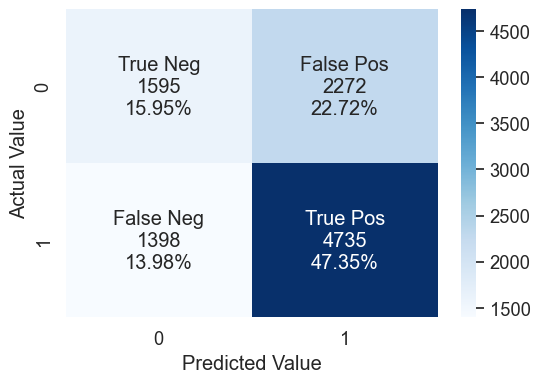

Accuracy Score  :  0.633
Precision Score :  0.676
Recall Score    :  0.772
F1 Score        :  0.721
Mean Accuracy of Model :  0.635
Standard Deviation is  :  0.005



In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(sc_X_train, y_train)
rf_y_pred = rf_classifier.predict(sc_X_test)
print("Random Forest Model")
heatmap_confusion_matrix(y_test, rf_y_pred)
classification_metrics(y_test, rf_y_pred)
k_fold_cross_validation(rf_classifier, X_train, y_train, 10)


🔍 Random Forest (Best Params): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Model


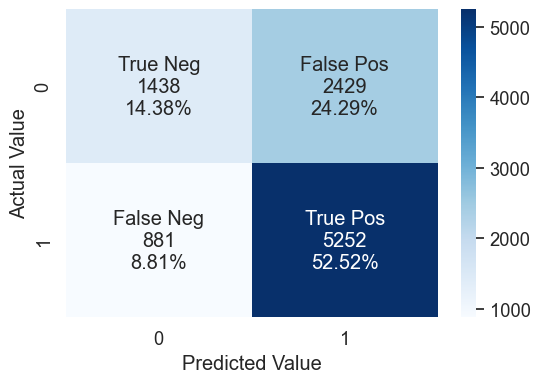

Accuracy Score  :  0.669
Precision Score :  0.684
Recall Score    :  0.856
F1 Score        :  0.76
Mean Accuracy of Model :  0.673
Standard Deviation is  :  0.005

🔍 Decision Tree (Best Params): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Model


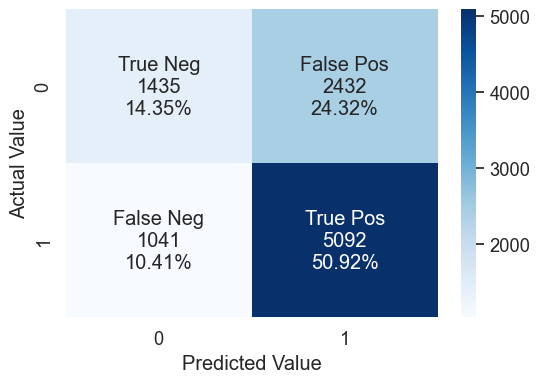

Accuracy Score  :  0.653
Precision Score :  0.677
Recall Score    :  0.83
F1 Score        :  0.746
Mean Accuracy of Model :  0.659
Standard Deviation is  :  0.006

🔍 Logistic Regression (Best Params): {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Model


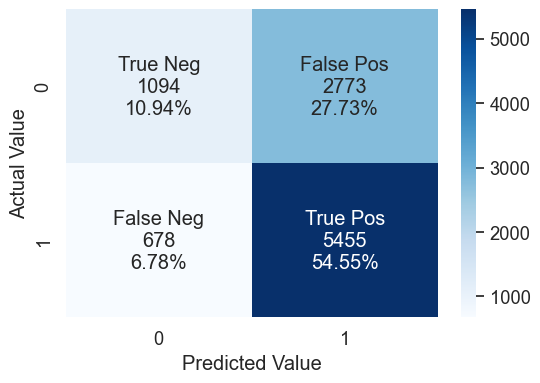

Accuracy Score  :  0.655
Precision Score :  0.663
Recall Score    :  0.889
F1 Score        :  0.76
Mean Accuracy of Model :  0.663
Standard Deviation is  :  0.005



In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# ---------------------- RANDOM FOREST ----------------------
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid.fit(sc_X_train, y_train)
best_rf = rf_grid.best_estimator_

rf_y_pred = best_rf.predict(sc_X_test)
print("🔍 Random Forest (Best Params):", rf_grid.best_params_)
print("Random Forest Model")
heatmap_confusion_matrix(y_test, rf_y_pred)
classification_metrics(y_test, rf_y_pred)
k_fold_cross_validation(best_rf, X_train, y_train, 10)

# ---------------------- DECISION TREE ----------------------
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, n_jobs=-1, scoring='accuracy')
dt_grid.fit(sc_X_train, y_train)
best_dt = dt_grid.best_estimator_

dt_y_pred = best_dt.predict(sc_X_test)
print("🔍 Decision Tree (Best Params):", dt_grid.best_params_)
print("Decision Tree Model")
heatmap_confusion_matrix(y_test, dt_y_pred)
classification_metrics(y_test, dt_y_pred)
k_fold_cross_validation(best_dt, X_train, y_train, 10)

# ---------------------- LOGISTIC REGRESSION ----------------------
log_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}

log_grid = GridSearchCV(LogisticRegression(), log_params, cv=5, n_jobs=-1, scoring='accuracy')
log_grid.fit(sc_X_train, y_train)
best_log = log_grid.best_estimator_

log_y_pred = best_log.predict(sc_X_test)
print("🔍 Logistic Regression (Best Params):", log_grid.best_params_)
print("Logistic Regression Model")
heatmap_confusion_matrix(y_test, log_y_pred)
classification_metrics(y_test, log_y_pred)
k_fold_cross_validation(best_log, X_train, y_train, 10)


🔍 Random Forest (Best Params): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 70}
Random Forest Model


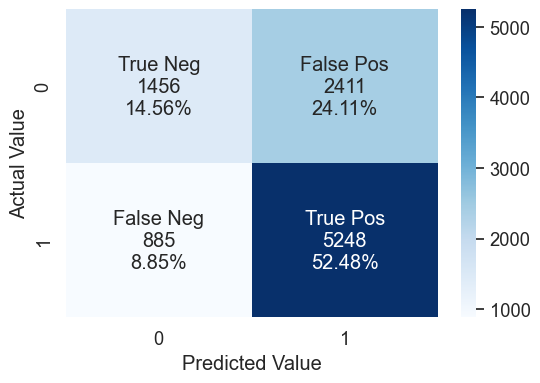

Accuracy Score  :  0.67
Precision Score :  0.685
Recall Score    :  0.856
F1 Score        :  0.761
Mean Accuracy of Model :  0.672
Standard Deviation is  :  0.005

🔍 Decision Tree (Best Params): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}
Decision Tree Model


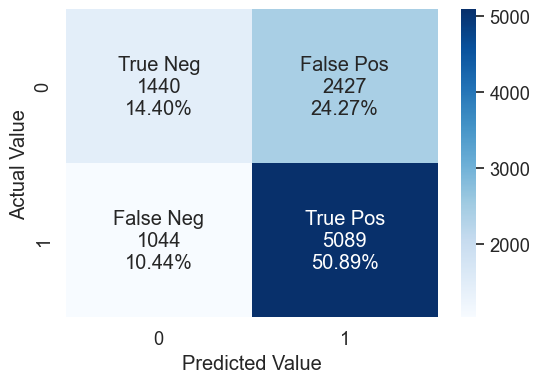

Accuracy Score  :  0.653
Precision Score :  0.677
Recall Score    :  0.83
F1 Score        :  0.746
Mean Accuracy of Model :  0.659
Standard Deviation is  :  0.006

🔍 Logistic Regression (Best Params): {'C': np.float64(8.671761457749351), 'max_iter': 199, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Model


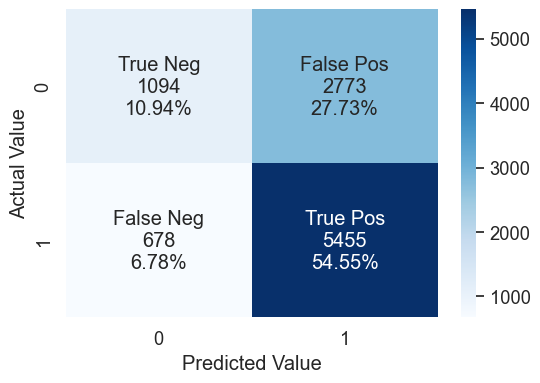

Accuracy Score  :  0.655
Precision Score :  0.663
Recall Score    :  0.889
F1 Score        :  0.76
Mean Accuracy of Model :  0.663
Standard Deviation is  :  0.005



In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint, uniform
import numpy as np

# ---------------------- RANDOM FOREST ----------------------
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_param_dist,
    n_iter=10,  # Try 10 random combinations
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)
rf_random.fit(sc_X_train, y_train)
best_rf = rf_random.best_estimator_

rf_y_pred = best_rf.predict(sc_X_test)
print("🔍 Random Forest (Best Params):", rf_random.best_params_)
print("Random Forest Model")
heatmap_confusion_matrix(y_test, rf_y_pred)
classification_metrics(y_test, rf_y_pred)
k_fold_cross_validation(best_rf, X_train, y_train, 10)

# ---------------------- DECISION TREE ----------------------
dt_param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

dt_random = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=dt_param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)
dt_random.fit(sc_X_train, y_train)
best_dt = dt_random.best_estimator_

dt_y_pred = best_dt.predict(sc_X_test)
print("🔍 Decision Tree (Best Params):", dt_random.best_params_)
print("Decision Tree Model")
heatmap_confusion_matrix(y_test, dt_y_pred)
classification_metrics(y_test, dt_y_pred)
k_fold_cross_validation(best_dt, X_train, y_train, 10)

# ---------------------- LOGISTIC REGRESSION ----------------------
log_param_dist = {
    'C': uniform(0.01, 10),
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': randint(100, 300)
}

log_random = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=log_param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)
log_random.fit(sc_X_train, y_train)
best_log = log_random.best_estimator_

log_y_pred = best_log.predict(sc_X_test)
print("🔍 Logistic Regression (Best Params):", log_random.best_params_)
print("Logistic Regression Model")
heatmap_confusion_matrix(y_test, log_y_pred)
classification_metrics(y_test, log_y_pred)
k_fold_cross_validation(best_log, X_train, y_train, 10)


Random Forest Model


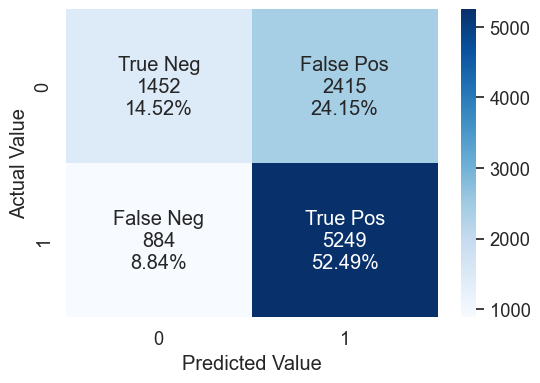

Accuracy Score  :  0.67
Precision Score :  0.685
Recall Score    :  0.856
F1 Score        :  0.761
Mean Accuracy of Model :  0.672
Standard Deviation is  :  0.004



In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42 
)
rf_classifier.fit(sc_X_train, y_train)
rf_y_pred = rf_classifier.predict(sc_X_test)
print("Random Forest Model")
heatmap_confusion_matrix(y_test, rf_y_pred)
classification_metrics(y_test, rf_y_pred)
k_fold_cross_validation(rf_classifier, X_train, y_train, 10)


In [36]:
import pickle

In [37]:
# Save model to pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)